In [9]:
strategy_name = '均线多头排列'
maxD = 4
inTime = 240
otTime = 949
tradeArea=[inTime,otTime]
offStart = ('close_mtx',0)


In [10]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import pymongo
import numpy as np
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import importlib
import rschLib
np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = client.quanLiang
dbt = client.tinySoftData
dtes, tkrs, name, open_mtx, high_mtx, low_mtx, close_mtx,belong, shenwan1, shenwan2, shenwan3, vol_mtx, amount_mtx = rschLib.loadDailyBarMtx()

In [11]:
importlib.reload(rschLib)
timeAsFloat, timeLabels, maxM, dayOff = rschLib.getTimeLabels(maxD)
print(timeLabels[inTime],timeLabels[otTime])

第2天09:31 第4天14:50


In [12]:
trades, tradesUsed, Po, r = rschLib.getTrades(strategy_name, name, tkrs, dtes, maxD, maxM)

10000 / 612026 960 2018-11-09 01:31:00 2018-11-14 07:00:00
20000 / 612026 960 2018-11-15 01:31:00 2018-11-20 07:00:00
30000 / 612026 960 2018-11-20 01:31:00 2018-11-23 07:00:00
40000 / 612026 960 2018-12-05 01:31:00 2018-12-10 07:00:00
50000 / 612026 960 2019-01-04 01:31:00 2019-01-09 07:00:00
60000 / 612026 960 2019-01-17 01:31:00 2019-01-22 07:00:00
70000 / 612026 960 2019-01-29 01:31:00 2019-02-01 07:00:00
80000 / 612026 960 2019-02-14 01:31:00 2019-02-19 07:00:00
100000 / 612026 960 2019-02-25 01:31:00 2019-02-28 07:00:00
110000 / 612026 960 2019-02-28 01:31:00 2019-03-05 07:00:00
120000 / 612026 960 2019-03-05 01:31:00 2019-03-08 07:00:00
130000 / 612026 960 2019-03-07 01:31:00 2019-03-12 07:00:00
140000 / 612026 960 2019-03-13 01:31:00 2019-03-18 07:00:00
170000 / 612026 960 2019-04-04 01:31:00 2019-04-10 07:00:00
180000 / 612026 960 2019-04-11 01:31:00 2019-04-16 07:00:00
190000 / 612026 960 2019-04-30 01:31:00 2019-05-08 07:00:00
200000 / 612026 960 2019-06-13 01:31:00 2019-06-

In [13]:
importlib.reload(rschLib)
result = rschLib.getTradeAnalysisSampleGroups(r, tradeArea)

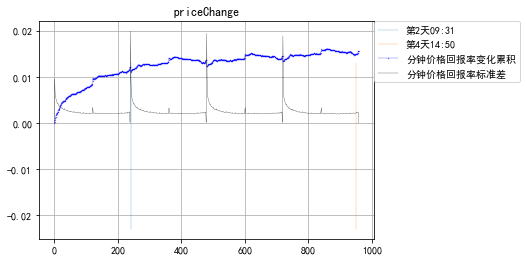

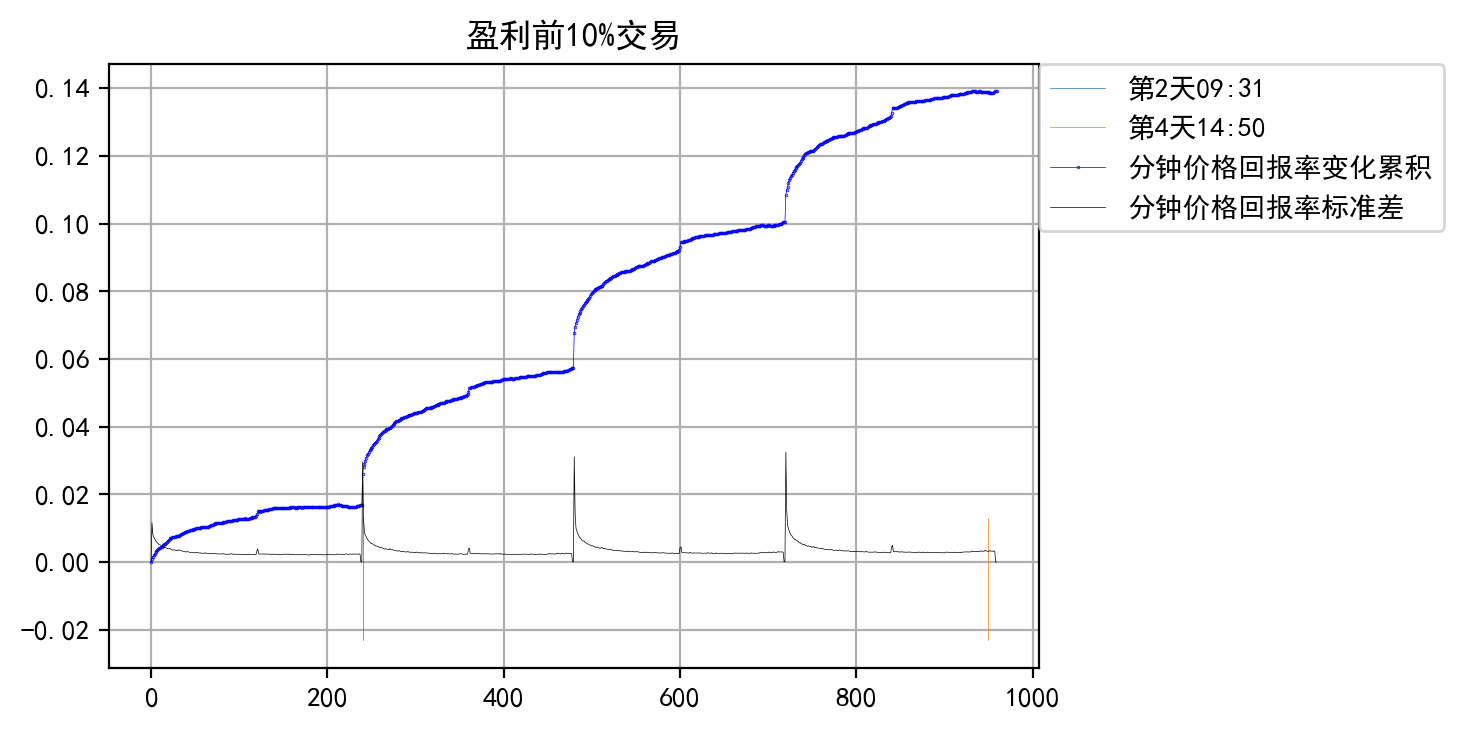

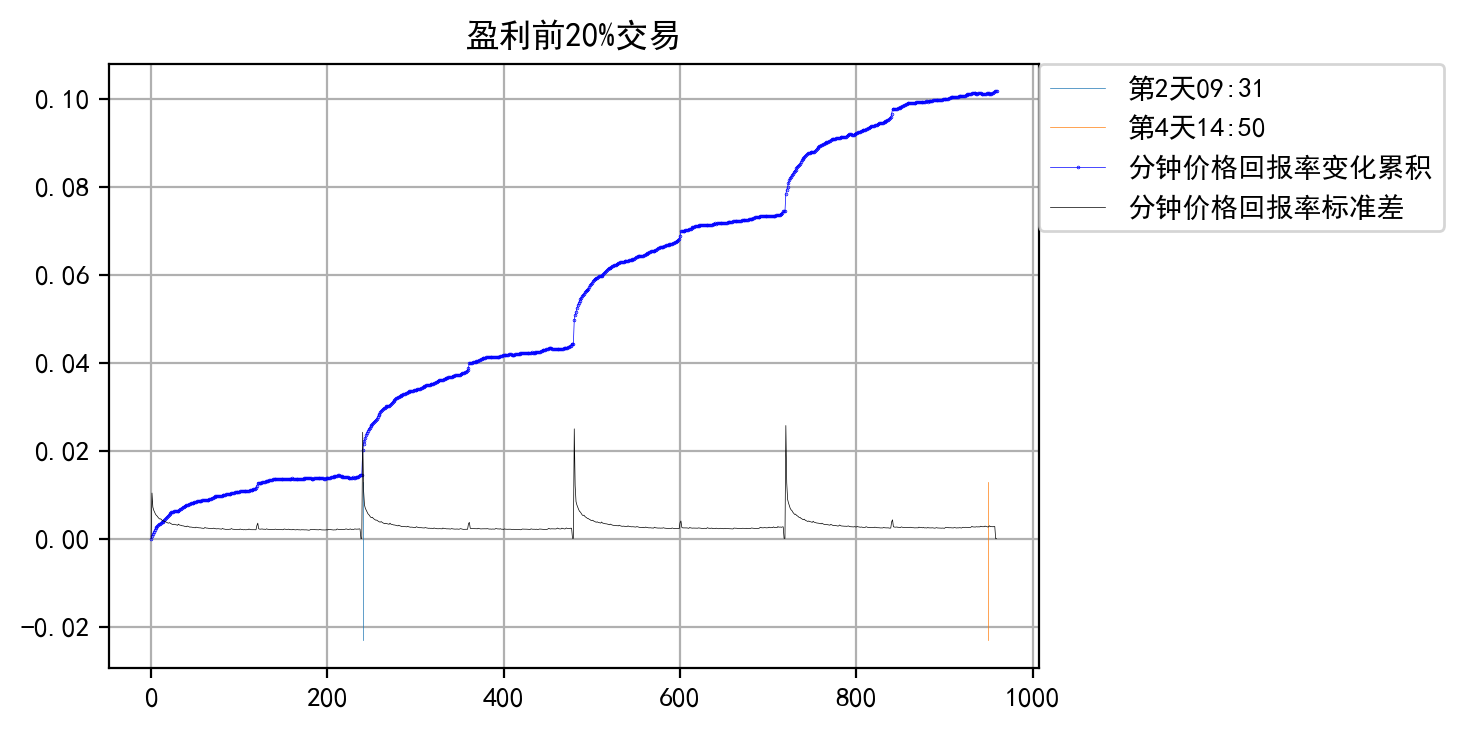

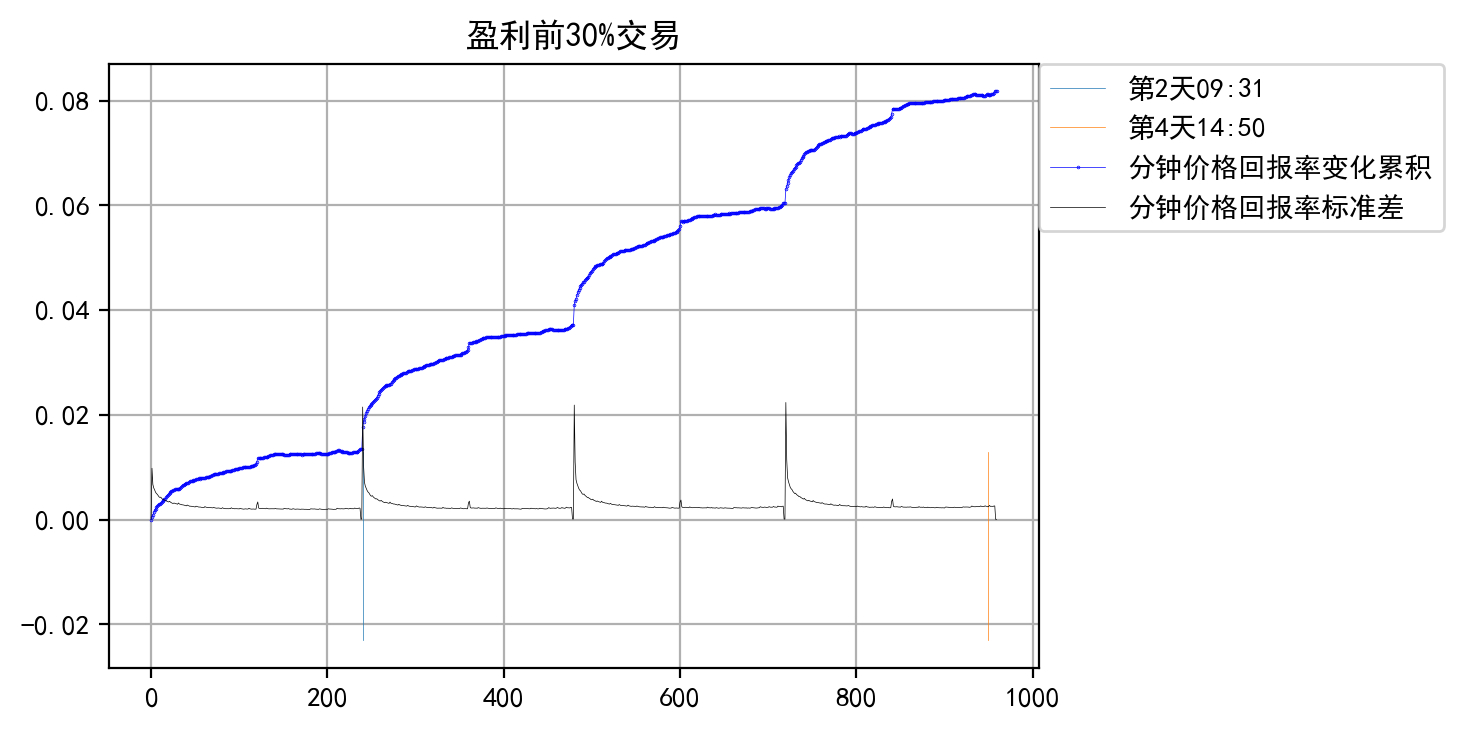

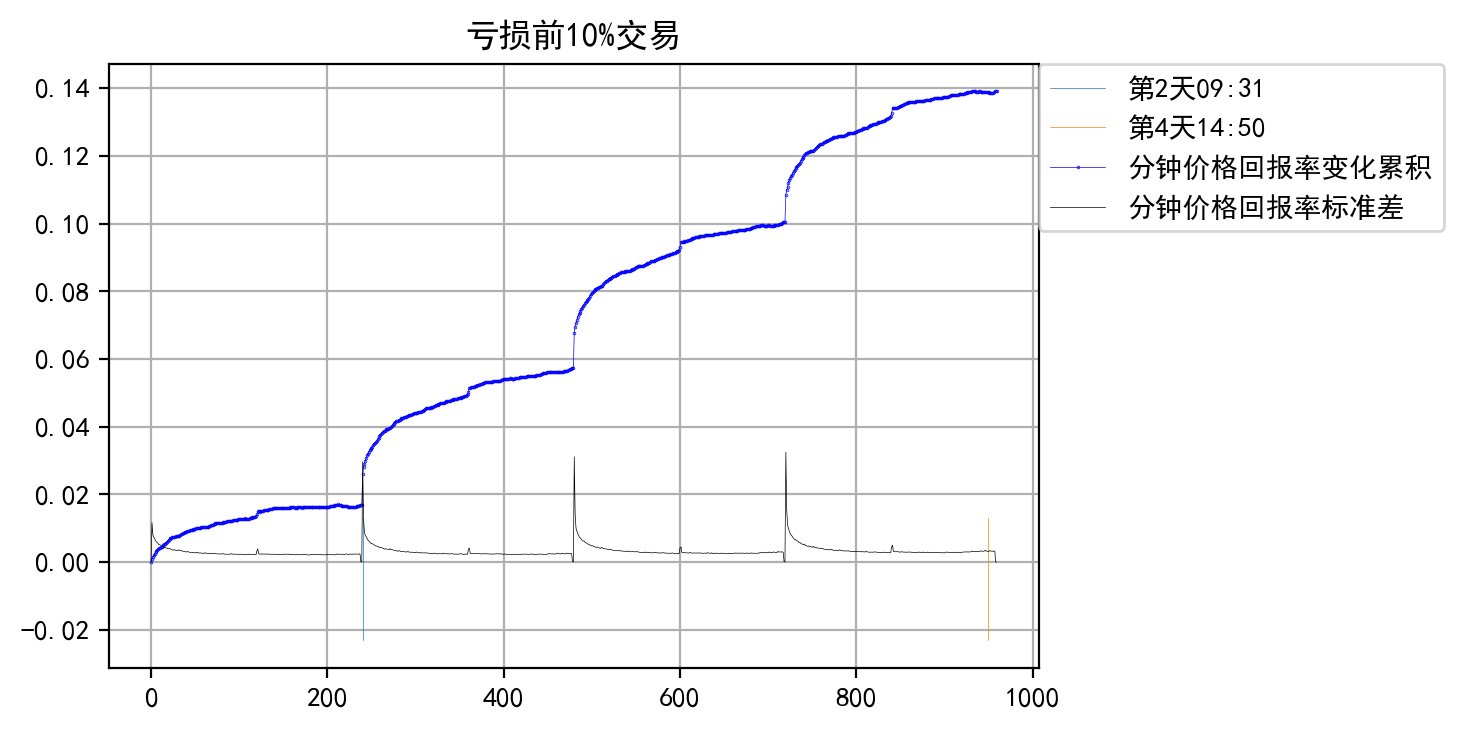

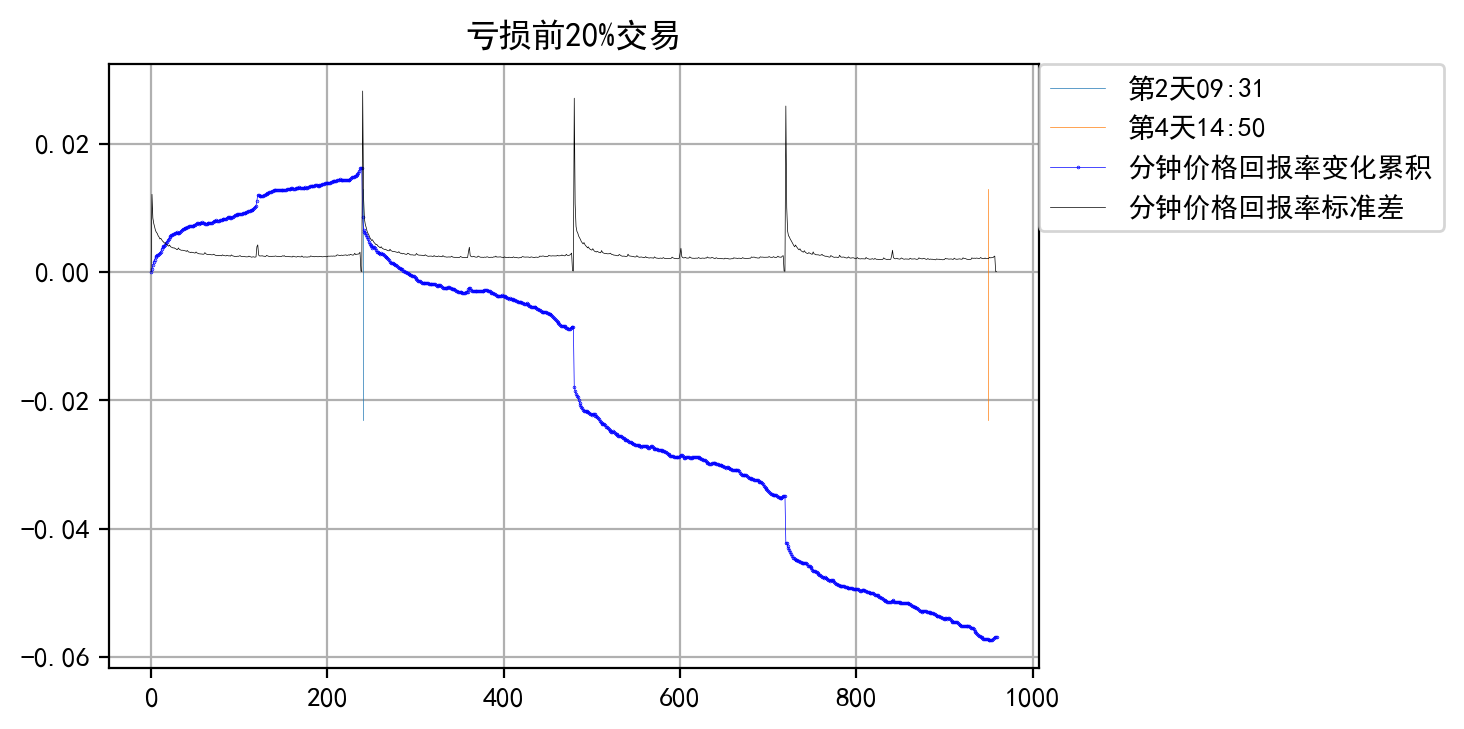

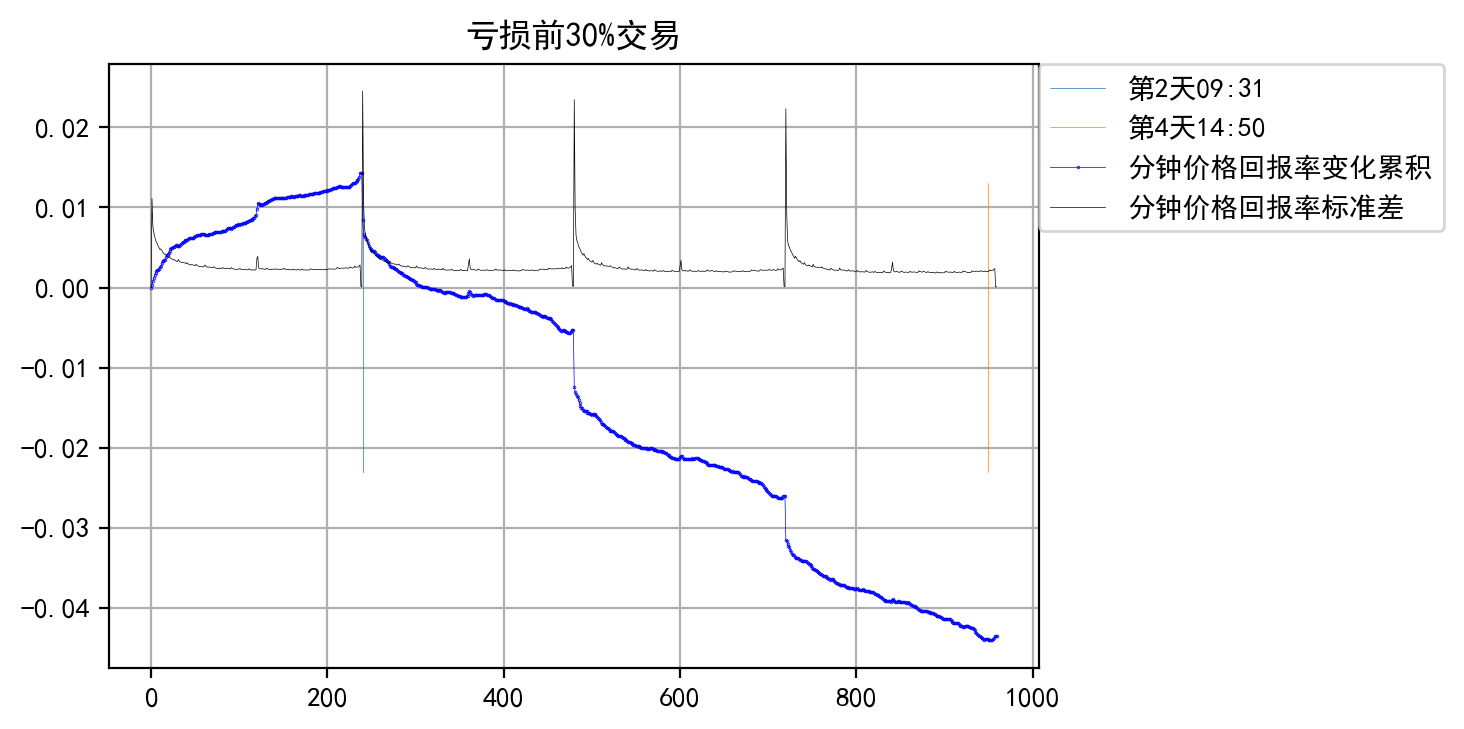

In [14]:
#h = np.max(np.cumsum(r[:, :tradeArea[0]], axis=1), axis=1)
#isZhangtingBeforeTradeArea = h>=0.05
importlib.reload(rschLib)
rschLib.drawPriceChange(r, strategy_name, timeLabels=timeLabels, tp=tradeArea)
rschLib.drawPriceChange(result['rGood10'], strategy_name, timeLabels=timeLabels, title='盈利前10%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rGood20'], strategy_name, timeLabels=timeLabels, title='盈利前20%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rGood30'], strategy_name, timeLabels=timeLabels, title='盈利前30%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rBad10'], strategy_name, timeLabels=timeLabels, title='亏损前10%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rBad20'], strategy_name, timeLabels=timeLabels, title='亏损前20%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rBad30'], strategy_name, timeLabels=timeLabels, title='亏损前30%交易', tp=tradeArea)

In [15]:
importlib.reload(rschLib)
rschLib.analyzeTradeTags(trades, result['rGood10'], result['idxGood10'], '盈利前10%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rGood20'], result['idxGood20'], '盈利前20%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rGood30'], result['idxGood30'], '盈利前30%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rBad10'], result['idxBad10'], '亏损前10%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rBad20'], result['idxBad20'], '亏损前20%交易',strategy_name, dtes, name, offStart)
rschLib.analyzeTradeTags(trades, result['rBad30'], result['idxBad30'], '亏损前30%交易',strategy_name, dtes, name, offStart)

盈利前10%交易 跳空高开 6.25 287198.0
盈利前10%交易 突破1年新高(开盘) 1.69 106992
盈利前10%交易 突破3个月新高(开盘) 4.78 163392
盈利前10%交易 均线多头排列 100.0 3230248.0
盈利前10%交易 MACD高于DEA 83.74 5649717
盈利前10%交易 MACD大于0 83.74 5649717
盈利前10%交易 交易量放大2倍 9.92 673069.0
盈利前10%交易 流通市值大于100亿 16.99 1467088.0
盈利前10%交易 流通市值大于250亿 6.67 515943.0
盈利前10%交易 流通市值大于500亿 2.81 219310.0
盈利前10%交易 流通市值小于100亿 83.01 16396080.0
盈利前10%交易 流通市值小于50亿 68.45 14827703.0
盈利前10%交易 流通市值小于25亿 45.41 12646403.0
盈利前20%交易 跳空高开 6.16 287198.0
盈利前20%交易 突破1年新高(开盘) 1.72 106992
盈利前20%交易 突破3个月新高(开盘) 4.67 163392
盈利前20%交易 均线多头排列 100.0 3230248.0
盈利前20%交易 MACD高于DEA 83.41 5649717
盈利前20%交易 MACD大于0 83.41 5649717
盈利前20%交易 交易量放大2倍 9.65 673069.0
盈利前20%交易 流通市值大于100亿 17.09 1467088.0
盈利前20%交易 流通市值大于250亿 6.74 515943.0
盈利前20%交易 流通市值大于500亿 2.87 219310.0
盈利前20%交易 流通市值小于100亿 82.91 16396080.0
盈利前20%交易 流通市值小于50亿 68.29 14827703.0
盈利前20%交易 流通市值小于25亿 45.42 12646403.0
盈利前30%交易 跳空高开 6.06 287198.0
盈利前30%交易 突破1年新高(开盘) 1.74 106992
盈利前30%交易 突破3个月新高(开盘) 4.57 163392
盈利前30%交易 均线多头排列 100.0 3230248.0
盈利前30%交易 

In [16]:
importlib.reload(rschLib)
[dtesPnl,pnl, numTrades]=rschLib.getPnl(dtes,tkrs, name, trades, inTime, otTime, dayOff, timeAsFloat, toDatabase='yes')

None


UnboundLocalError: local variable 'dot' referenced before assignment

In [ ]:
importlib.reload(rschLib)
rschLib.pnlVsNumtrades(pnl, numTrades)